**Load Data and Initial Inspection**

In [1]:
import pandas as pd

df = pd.read_csv('Cardiotocographic.csv')

print("First 5 rows of the DataFrame:")
print(df.head())

print("\nConcise summary of the DataFrame:")
df.info()

print("\nDescriptive statistics of the DataFrame:")
print(df.describe())

First 5 rows of the DataFrame:
           LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  \
0  120.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5  43.0   
1  132.000000  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   0.0   
2  133.000000  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   0.0   
3  134.000000  0.002561  0.0  0.007742  0.002561  0.0  0.0  16.0   2.4   0.0   
4  131.948232  0.006515  0.0  0.008143  0.000000  0.0  0.0  16.0   2.4   0.0   

   MLTV  Width  Tendency  NSP  
0   2.4   64.0  0.999926  2.0  
1  10.4  130.0  0.000000  1.0  
2  13.4  130.0  0.000000  1.0  
3  23.0  117.0  1.000000  1.0  
4  19.9  117.0  1.000000  1.0  

Concise summary of the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float6

**Handle Missing Values**

In [2]:
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64


In [3]:
for column in df.columns:
    if df[column].isnull().sum() > 0:
        median_value = df[column].median()
        df[column].fillna(median_value, inplace=True)

print("Missing values after imputation:")
print(df.isnull().sum())

Missing values after imputation:
LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64


/tmp/ipython-input-2508519150.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(median_value, inplace=True)


In [4]:
for column in df.columns:
    if df[column].isnull().sum() > 0:
        median_value = df[column].median()
        df[column] = df[column].fillna(median_value)

print("Missing values after imputation:")
print(df.isnull().sum())

Missing values after imputation:
LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64


**Correct Data Types**

In [5]:
print("Current data types of the DataFrame:")
df.info()

Current data types of the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2126 non-null   float64
 1   AC        2126 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2126 non-null   float64
 6   DP        2126 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2126 non-null   float64
 11  Width     2126 non-null   float64
 12  Tendency  2126 non-null   float64
 13  NSP       2126 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


**Outlier Detection and Treatment**

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries imported: matplotlib.pyplot as plt, seaborn as sns")

Libraries imported: matplotlib.pyplot as plt, seaborn as sns


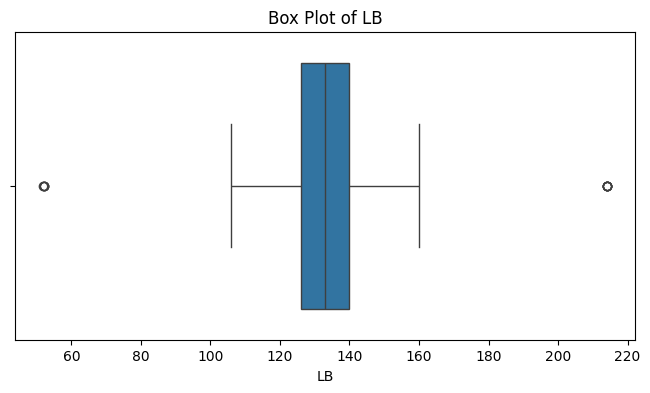

Column 'LB': 10 outliers found (Lower bound: 105.00, Upper bound: 161.00)


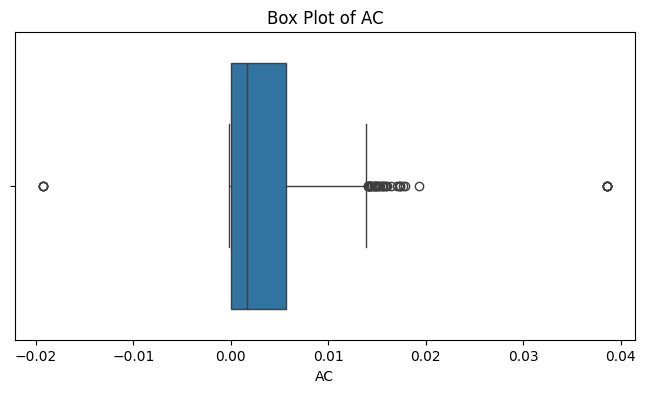

Column 'AC': 43 outliers found (Lower bound: -0.01, Upper bound: 0.01)


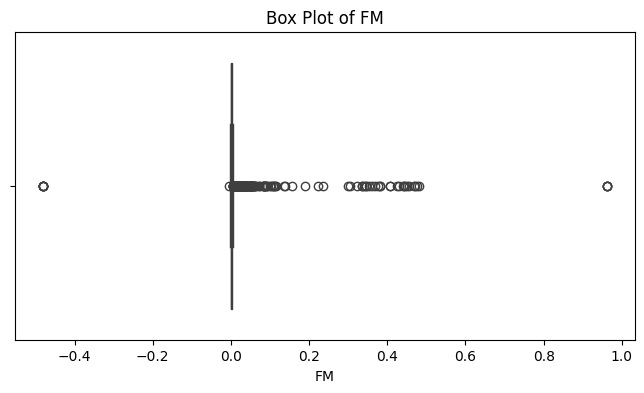

Column 'FM': 347 outliers found (Lower bound: -0.00, Upper bound: 0.01)


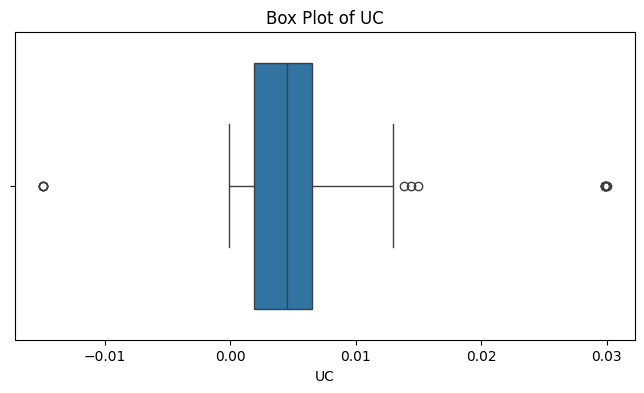

Column 'UC': 13 outliers found (Lower bound: -0.01, Upper bound: 0.01)


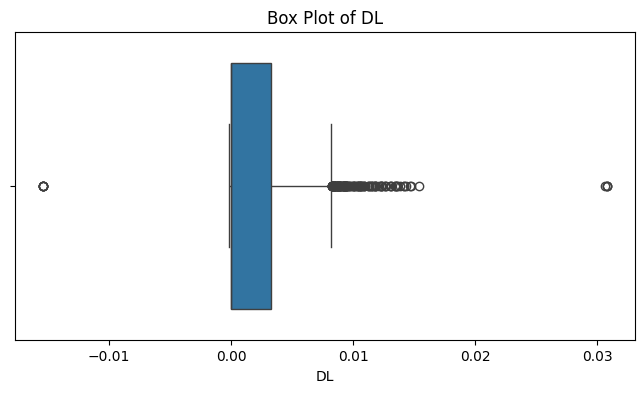

Column 'DL': 125 outliers found (Lower bound: -0.00, Upper bound: 0.01)


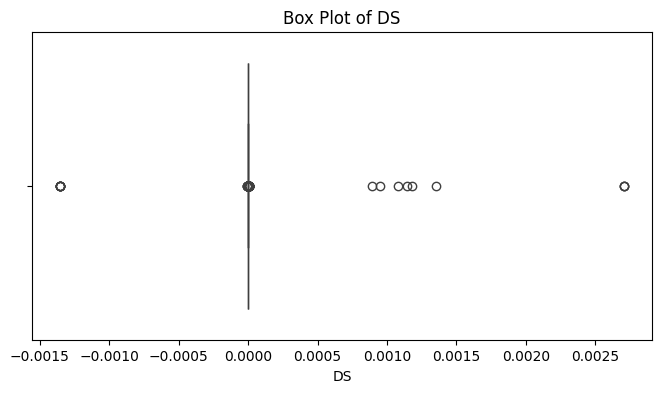

Column 'DS': 120 outliers found (Lower bound: 0.00, Upper bound: 0.00)


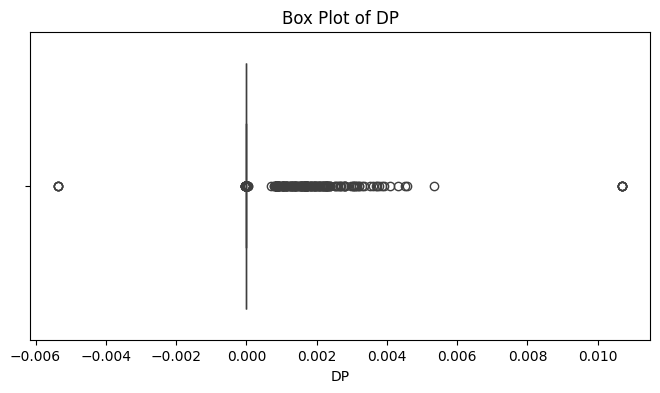

Column 'DP': 284 outliers found (Lower bound: 0.00, Upper bound: 0.00)


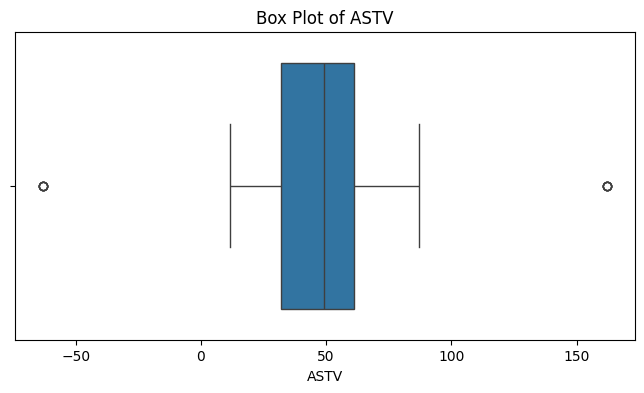

Column 'ASTV': 10 outliers found (Lower bound: -11.50, Upper bound: 104.50)


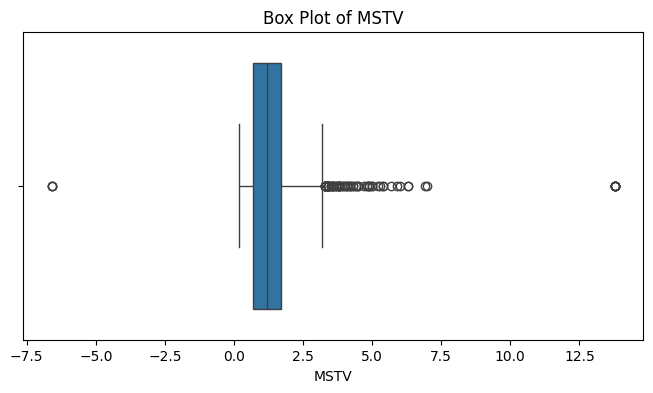

Column 'MSTV': 80 outliers found (Lower bound: -0.80, Upper bound: 3.20)


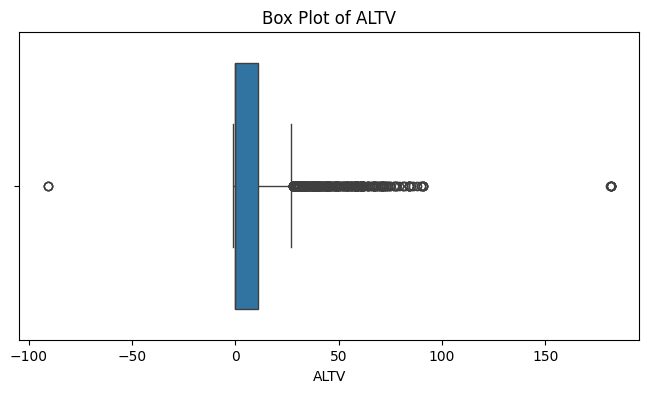

Column 'ALTV': 318 outliers found (Lower bound: -16.50, Upper bound: 27.50)


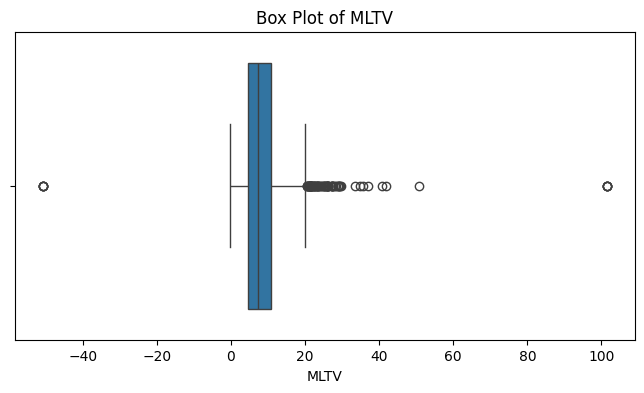

Column 'MLTV': 81 outliers found (Lower bound: -4.70, Upper bound: 20.10)


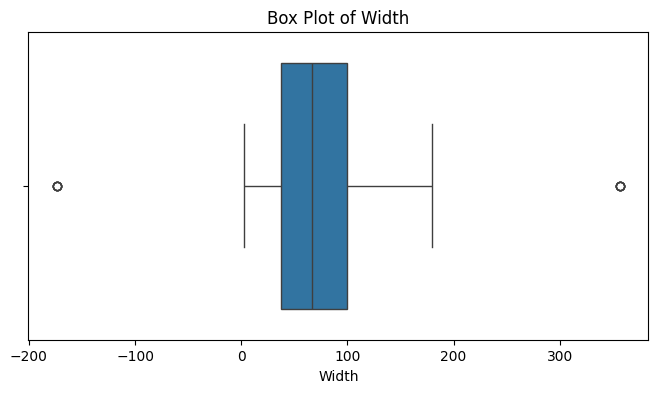

Column 'Width': 10 outliers found (Lower bound: -57.50, Upper bound: 194.50)


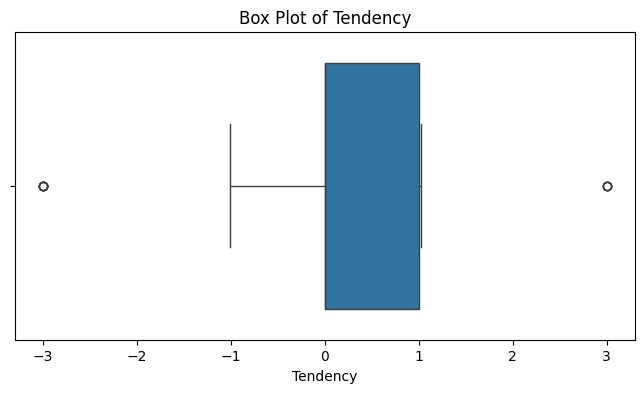

Column 'Tendency': 10 outliers found (Lower bound: -1.50, Upper bound: 2.50)


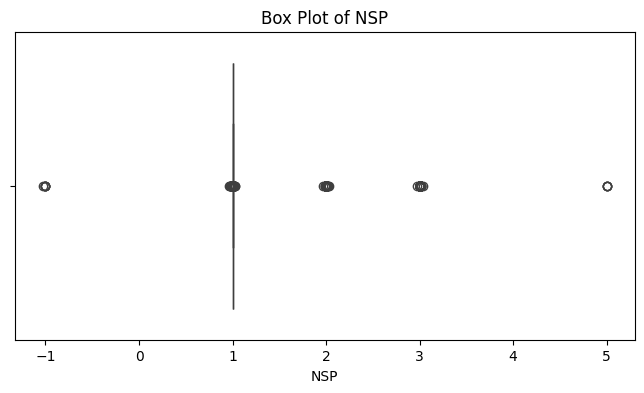

Column 'NSP': 559 outliers found (Lower bound: 1.00, Upper bound: 1.00)


In [7]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.show()

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_count = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
    print(f"Column '{col}': {outliers_count} outliers found (Lower bound: {lower_bound:.2f}, Upper bound: {upper_bound:.2f})")


In [8]:
for col in numerical_cols:
    if col == 'NSP': # Skip NSP as it appears to be categorical/ordinal
        print(f"Skipping outlier treatment for '{col}' due to its likely categorical nature.")
        continue

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap outliers
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    print(f"Column '{col}': Outliers capped within [{lower_bound:.2f}, {upper_bound:.2f}]")

print("\nOutlier treatment complete for relevant numerical columns.")

Column 'LB': Outliers capped within [105.00, 161.00]
Column 'AC': Outliers capped within [-0.01, 0.01]
Column 'FM': Outliers capped within [-0.00, 0.01]
Column 'UC': Outliers capped within [-0.01, 0.01]
Column 'DL': Outliers capped within [-0.00, 0.01]
Column 'DS': Outliers capped within [0.00, 0.00]
Column 'DP': Outliers capped within [0.00, 0.00]
Column 'ASTV': Outliers capped within [-11.50, 104.50]
Column 'MSTV': Outliers capped within [-0.80, 3.20]
Column 'ALTV': Outliers capped within [-16.50, 27.50]
Column 'MLTV': Outliers capped within [-4.70, 20.10]
Column 'Width': Outliers capped within [-57.50, 194.50]
Column 'Tendency': Outliers capped within [-1.50, 2.50]
Skipping outlier treatment for 'NSP' due to its likely categorical nature.

Outlier treatment complete for relevant numerical columns.


**Comprehensive Statistical Summary**

In [9]:
print("Comprehensive Statistical Summary:")
print(df.describe())

Comprehensive Statistical Summary:
                LB           AC           FM           UC           DL  \
count  2126.000000  2126.000000  2126.000000  2126.000000  2126.000000   
mean    133.290331     0.003132     0.001568     0.004362     0.001770   
std       9.930268     0.003828     0.002485     0.003001     0.002668   
min     105.000000    -0.008409    -0.003850    -0.005177    -0.004934   
25%     126.000000     0.000000     0.000000     0.001851     0.000000   
50%     133.000000     0.001634     0.000000     0.004484     0.000000   
75%     140.000000     0.005606     0.002567     0.006536     0.003289   
max     161.000000     0.014015     0.006416     0.013564     0.008224   

           DS      DP         ASTV         MSTV         ALTV         MLTV  \
count  2126.0  2126.0  2126.000000  2126.000000  2126.000000  2126.000000   
mean      0.0     0.0    46.981873     1.304644     6.691678     8.007471   
std       0.0     0.0    17.612745     0.781091    10.378400     5.

In [10]:
print("\nMedian of each numerical column:")
print(df.median().to_string())


Median of each numerical column:
LB          133.000000
AC            0.001634
FM            0.000000
UC            0.004484
DL            0.000000
DS            0.000000
DP            0.000000
ASTV         49.000000
MSTV          1.200000
ALTV          0.000000
MLTV          7.400000
Width        67.000000
Tendency      0.000000
NSP           1.000000


In [11]:
print("\nInterquartile Range (IQR) for each numerical column:")
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    print(f"{col}: {IQR:.2f}")


Interquartile Range (IQR) for each numerical column:
LB: 14.00
AC: 0.01
FM: 0.00
UC: 0.00
DL: 0.00
DS: 0.00
DP: 0.00
ASTV: 29.00
MSTV: 1.00
ALTV: 11.00
MLTV: 6.20
Width: 63.00
Tendency: 1.00
NSP: 0.00


## Visualize Numerical Distributions

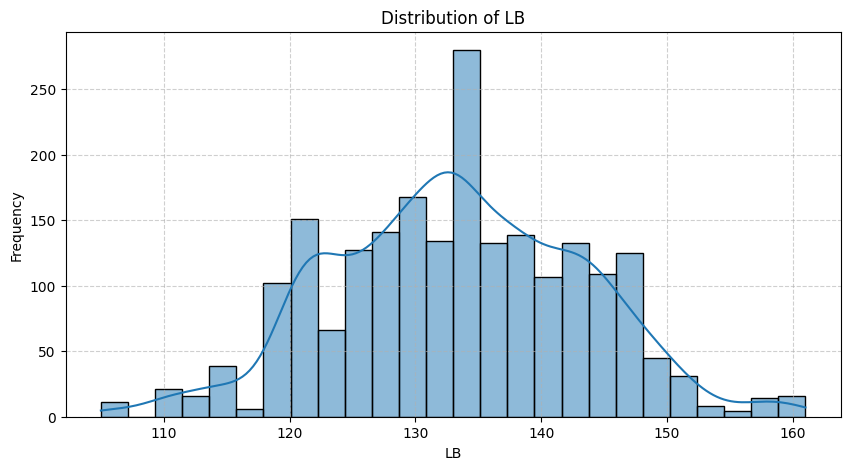

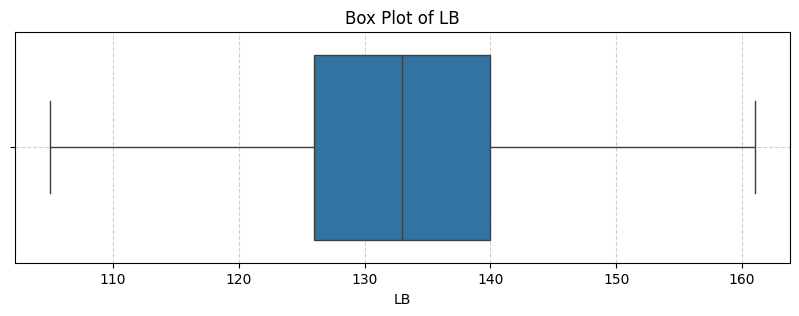

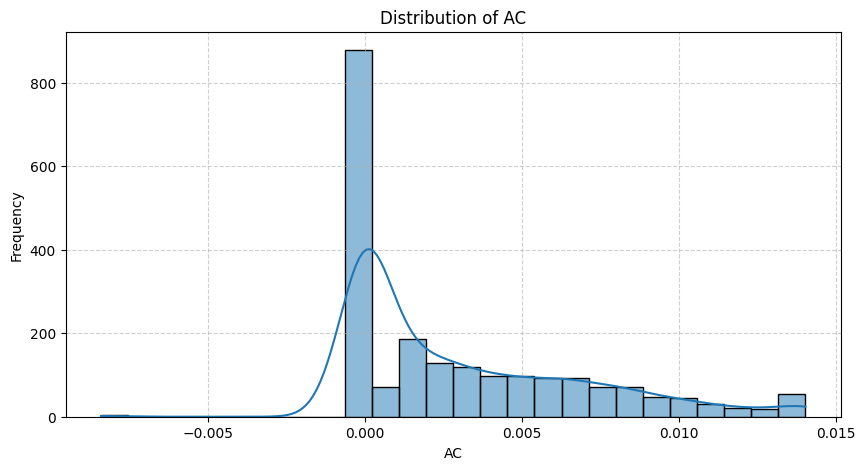

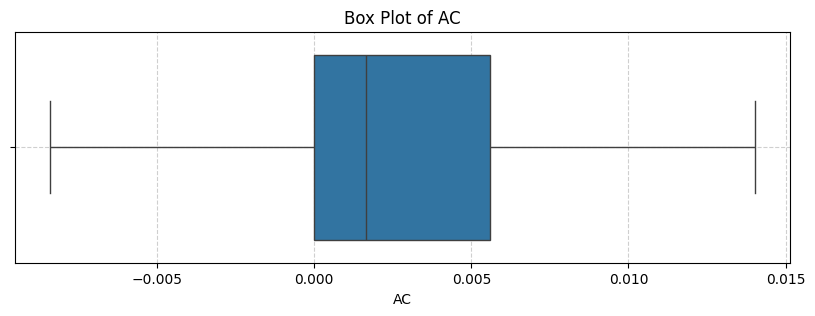

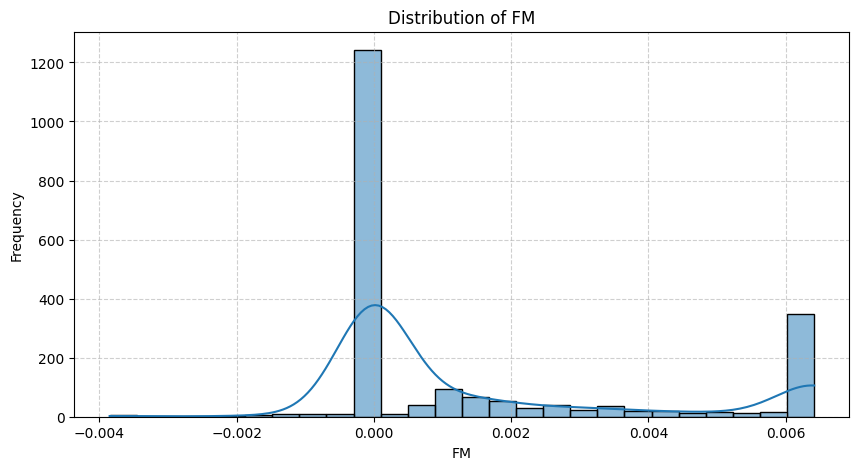

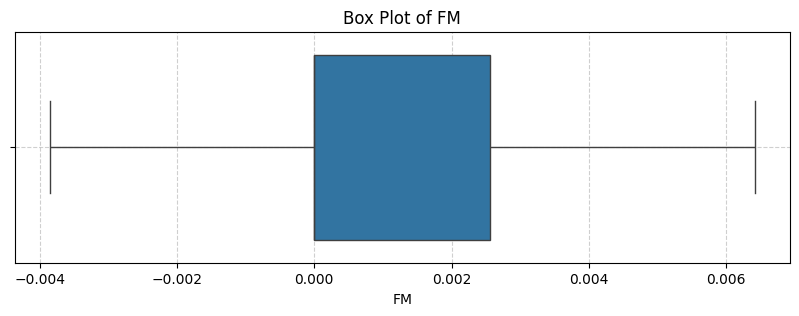

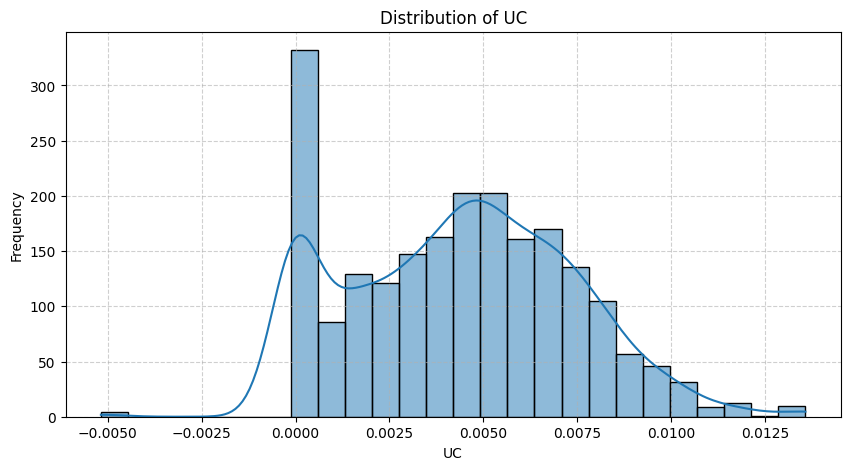

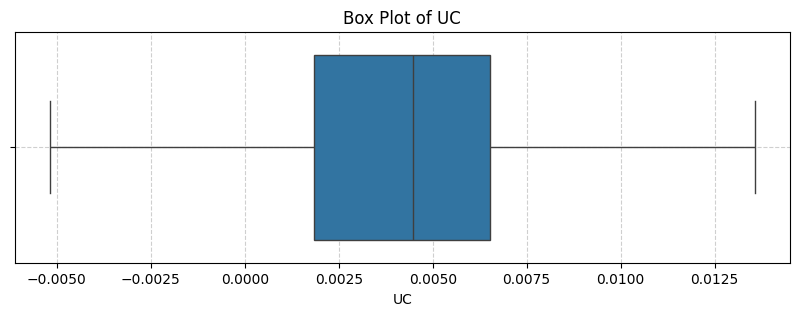

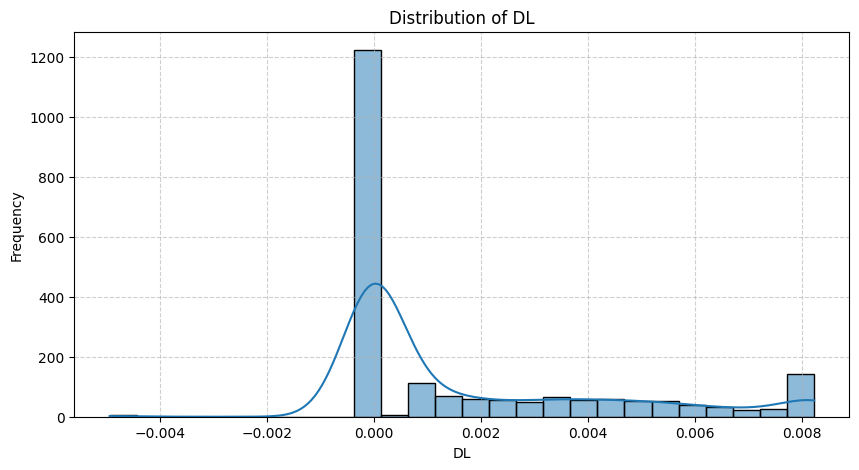

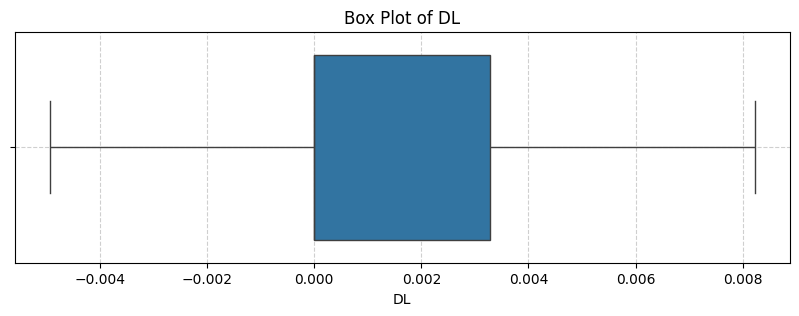

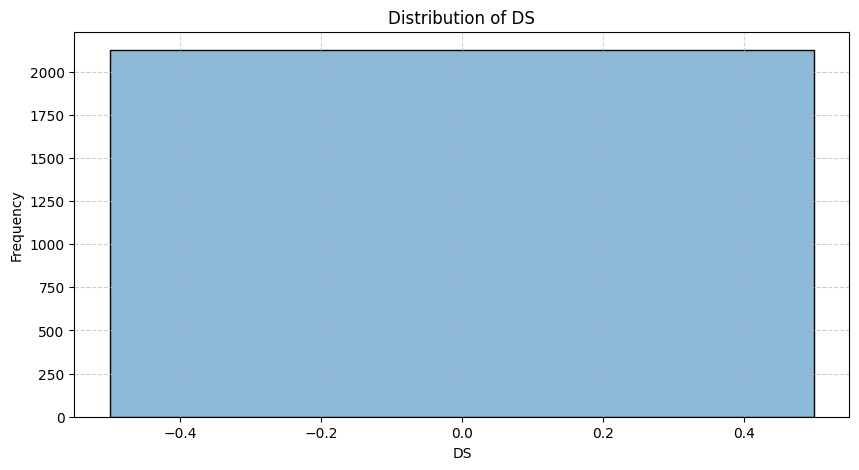

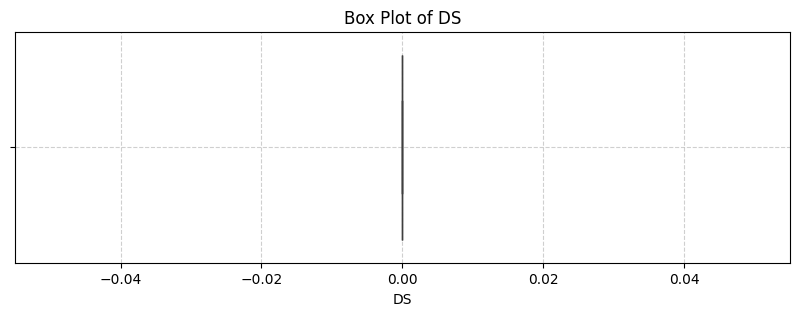

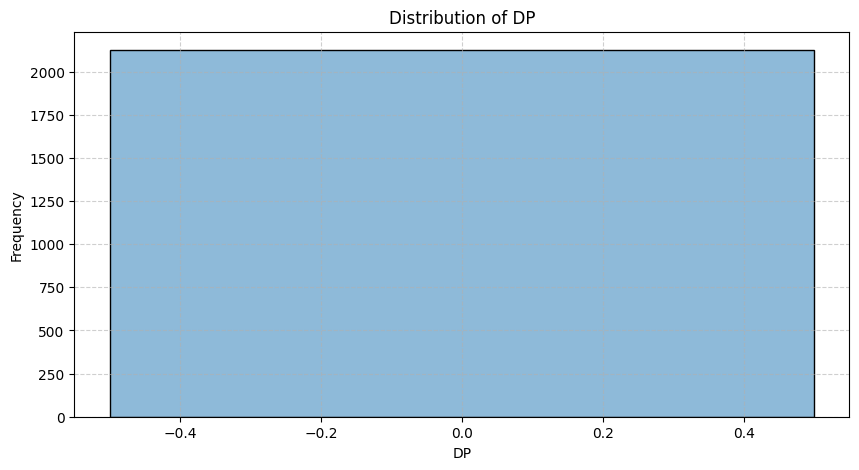

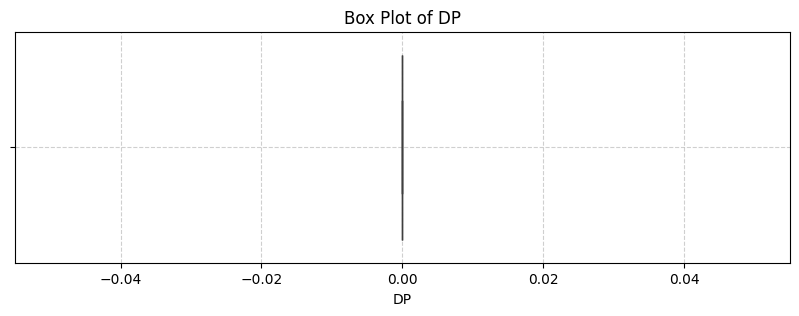

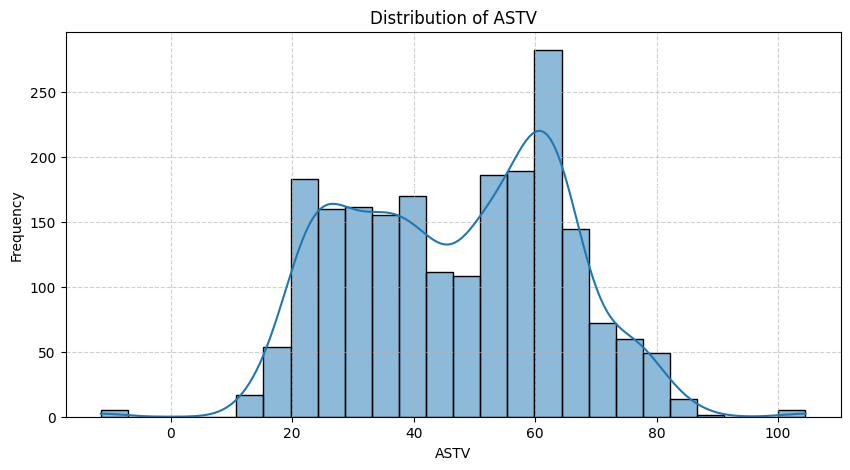

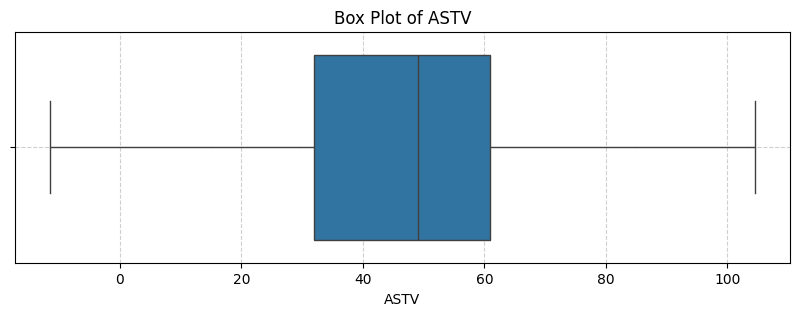

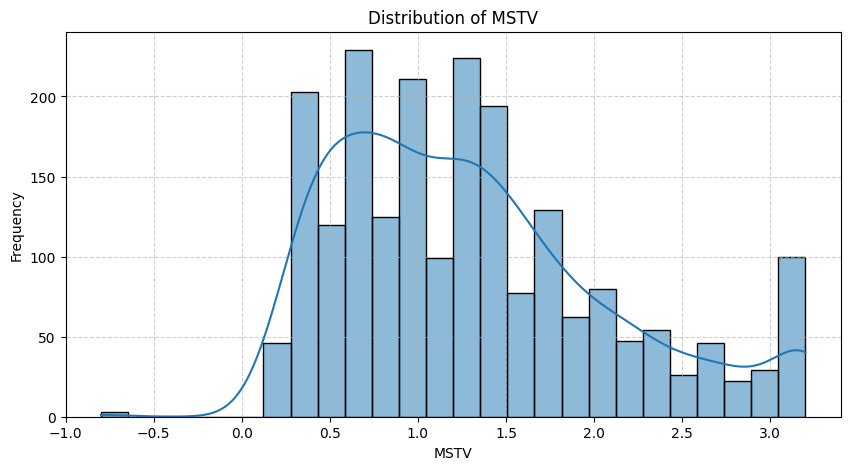

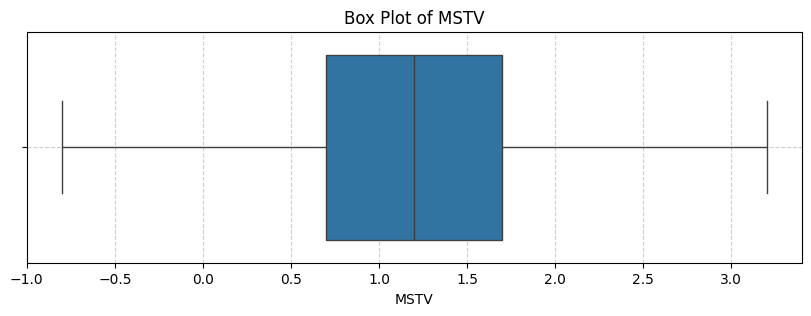

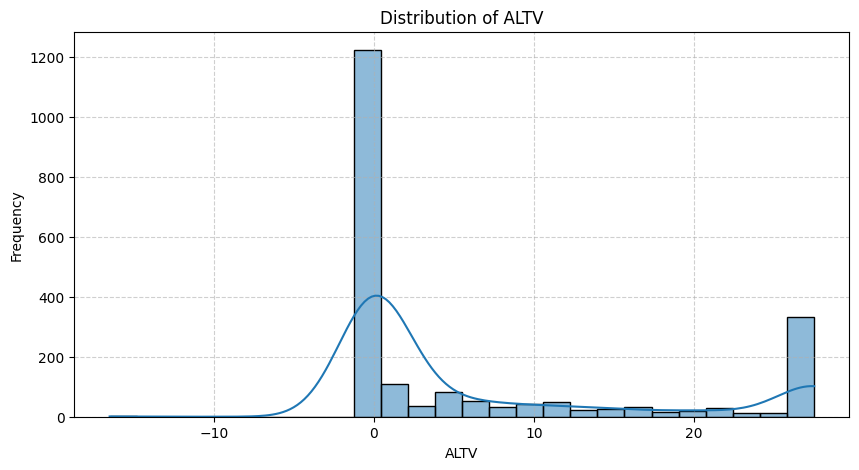

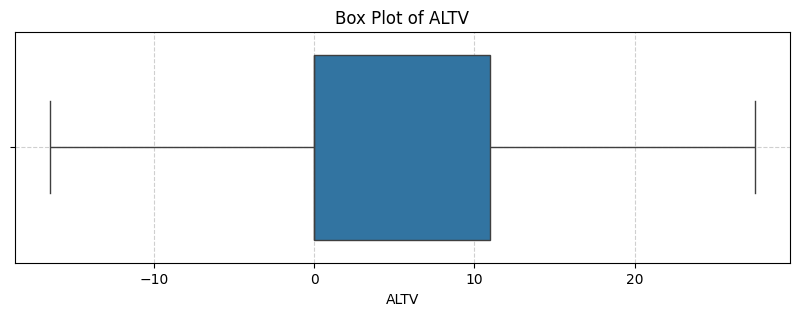

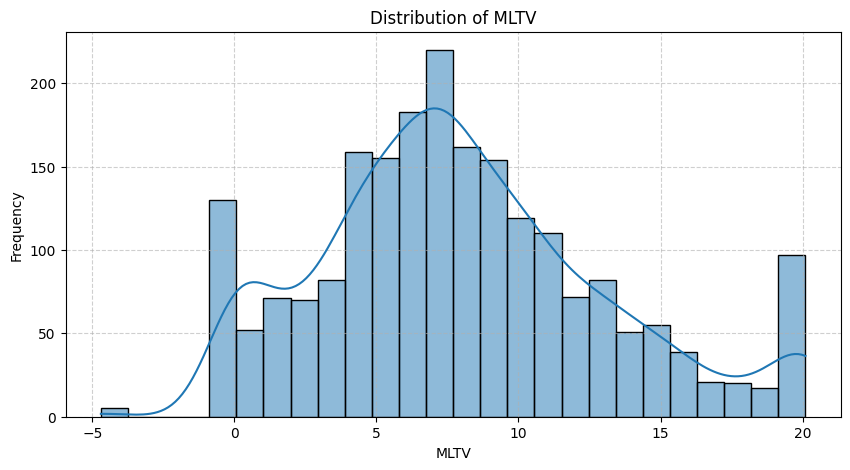

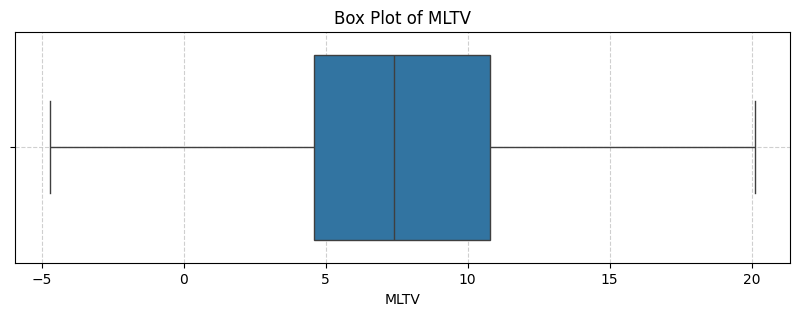

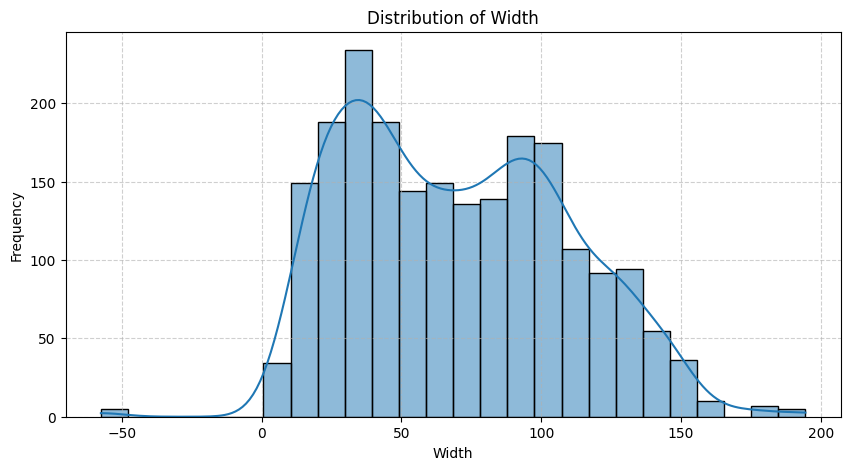

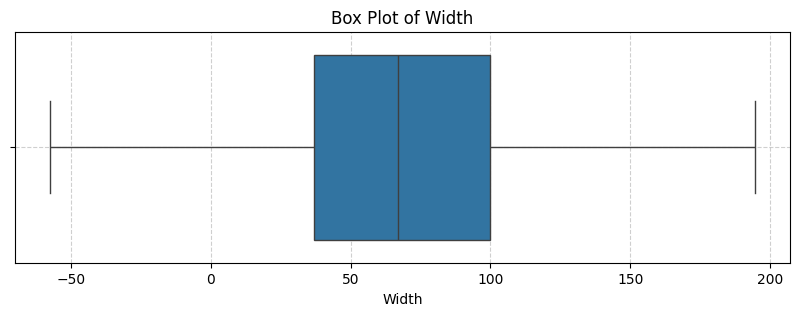

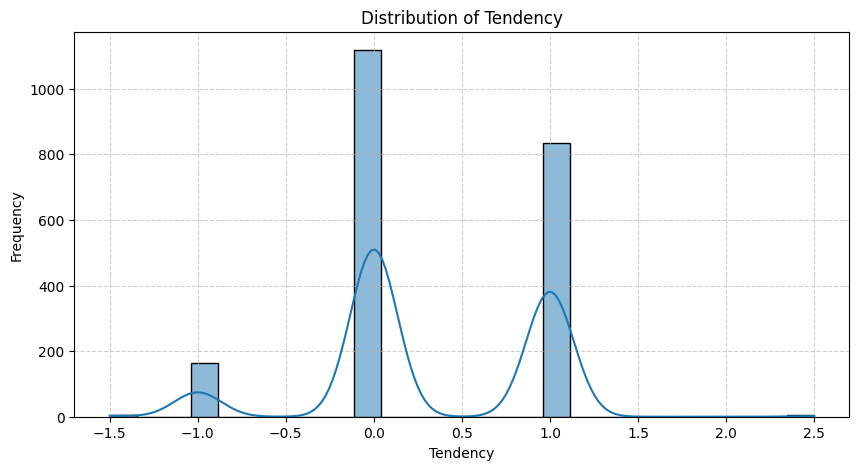

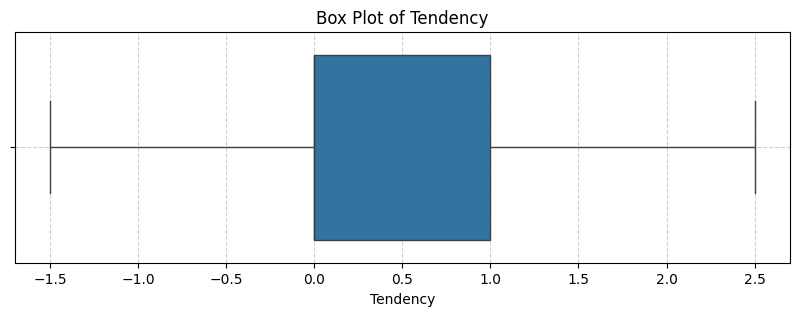

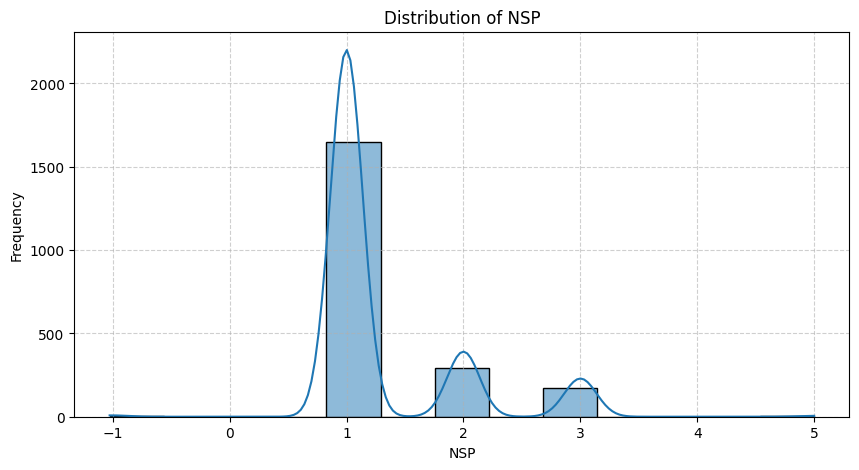

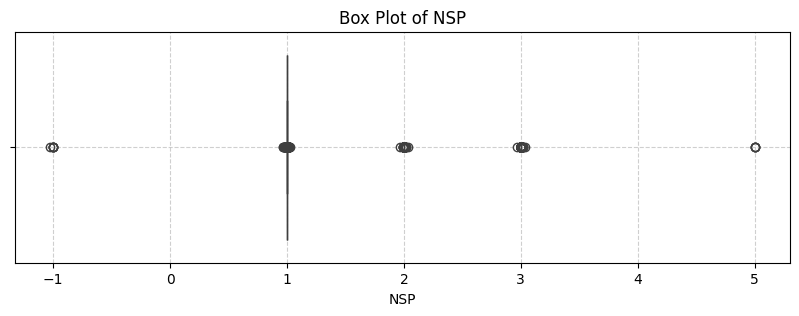

In [12]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_cols:
    # Create a histogram
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

    # Create a box plot
    plt.figure(figsize=(10, 3))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

## Explore Relationships with Correlation Heatmap

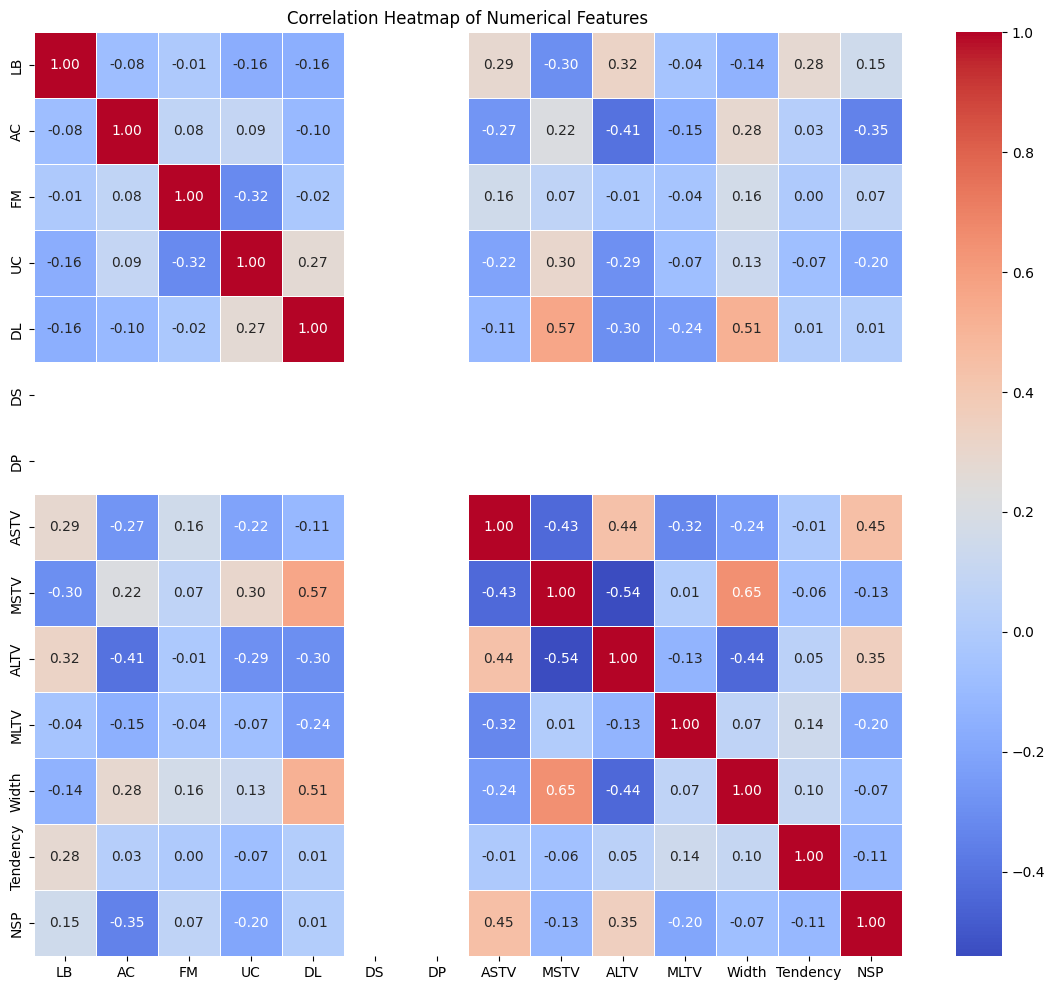

Correlation heatmap generated successfully.


In [13]:
correlation_matrix = df.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()
print("Correlation heatmap generated successfully.")

## Advanced Visualizations (Pair Plots)

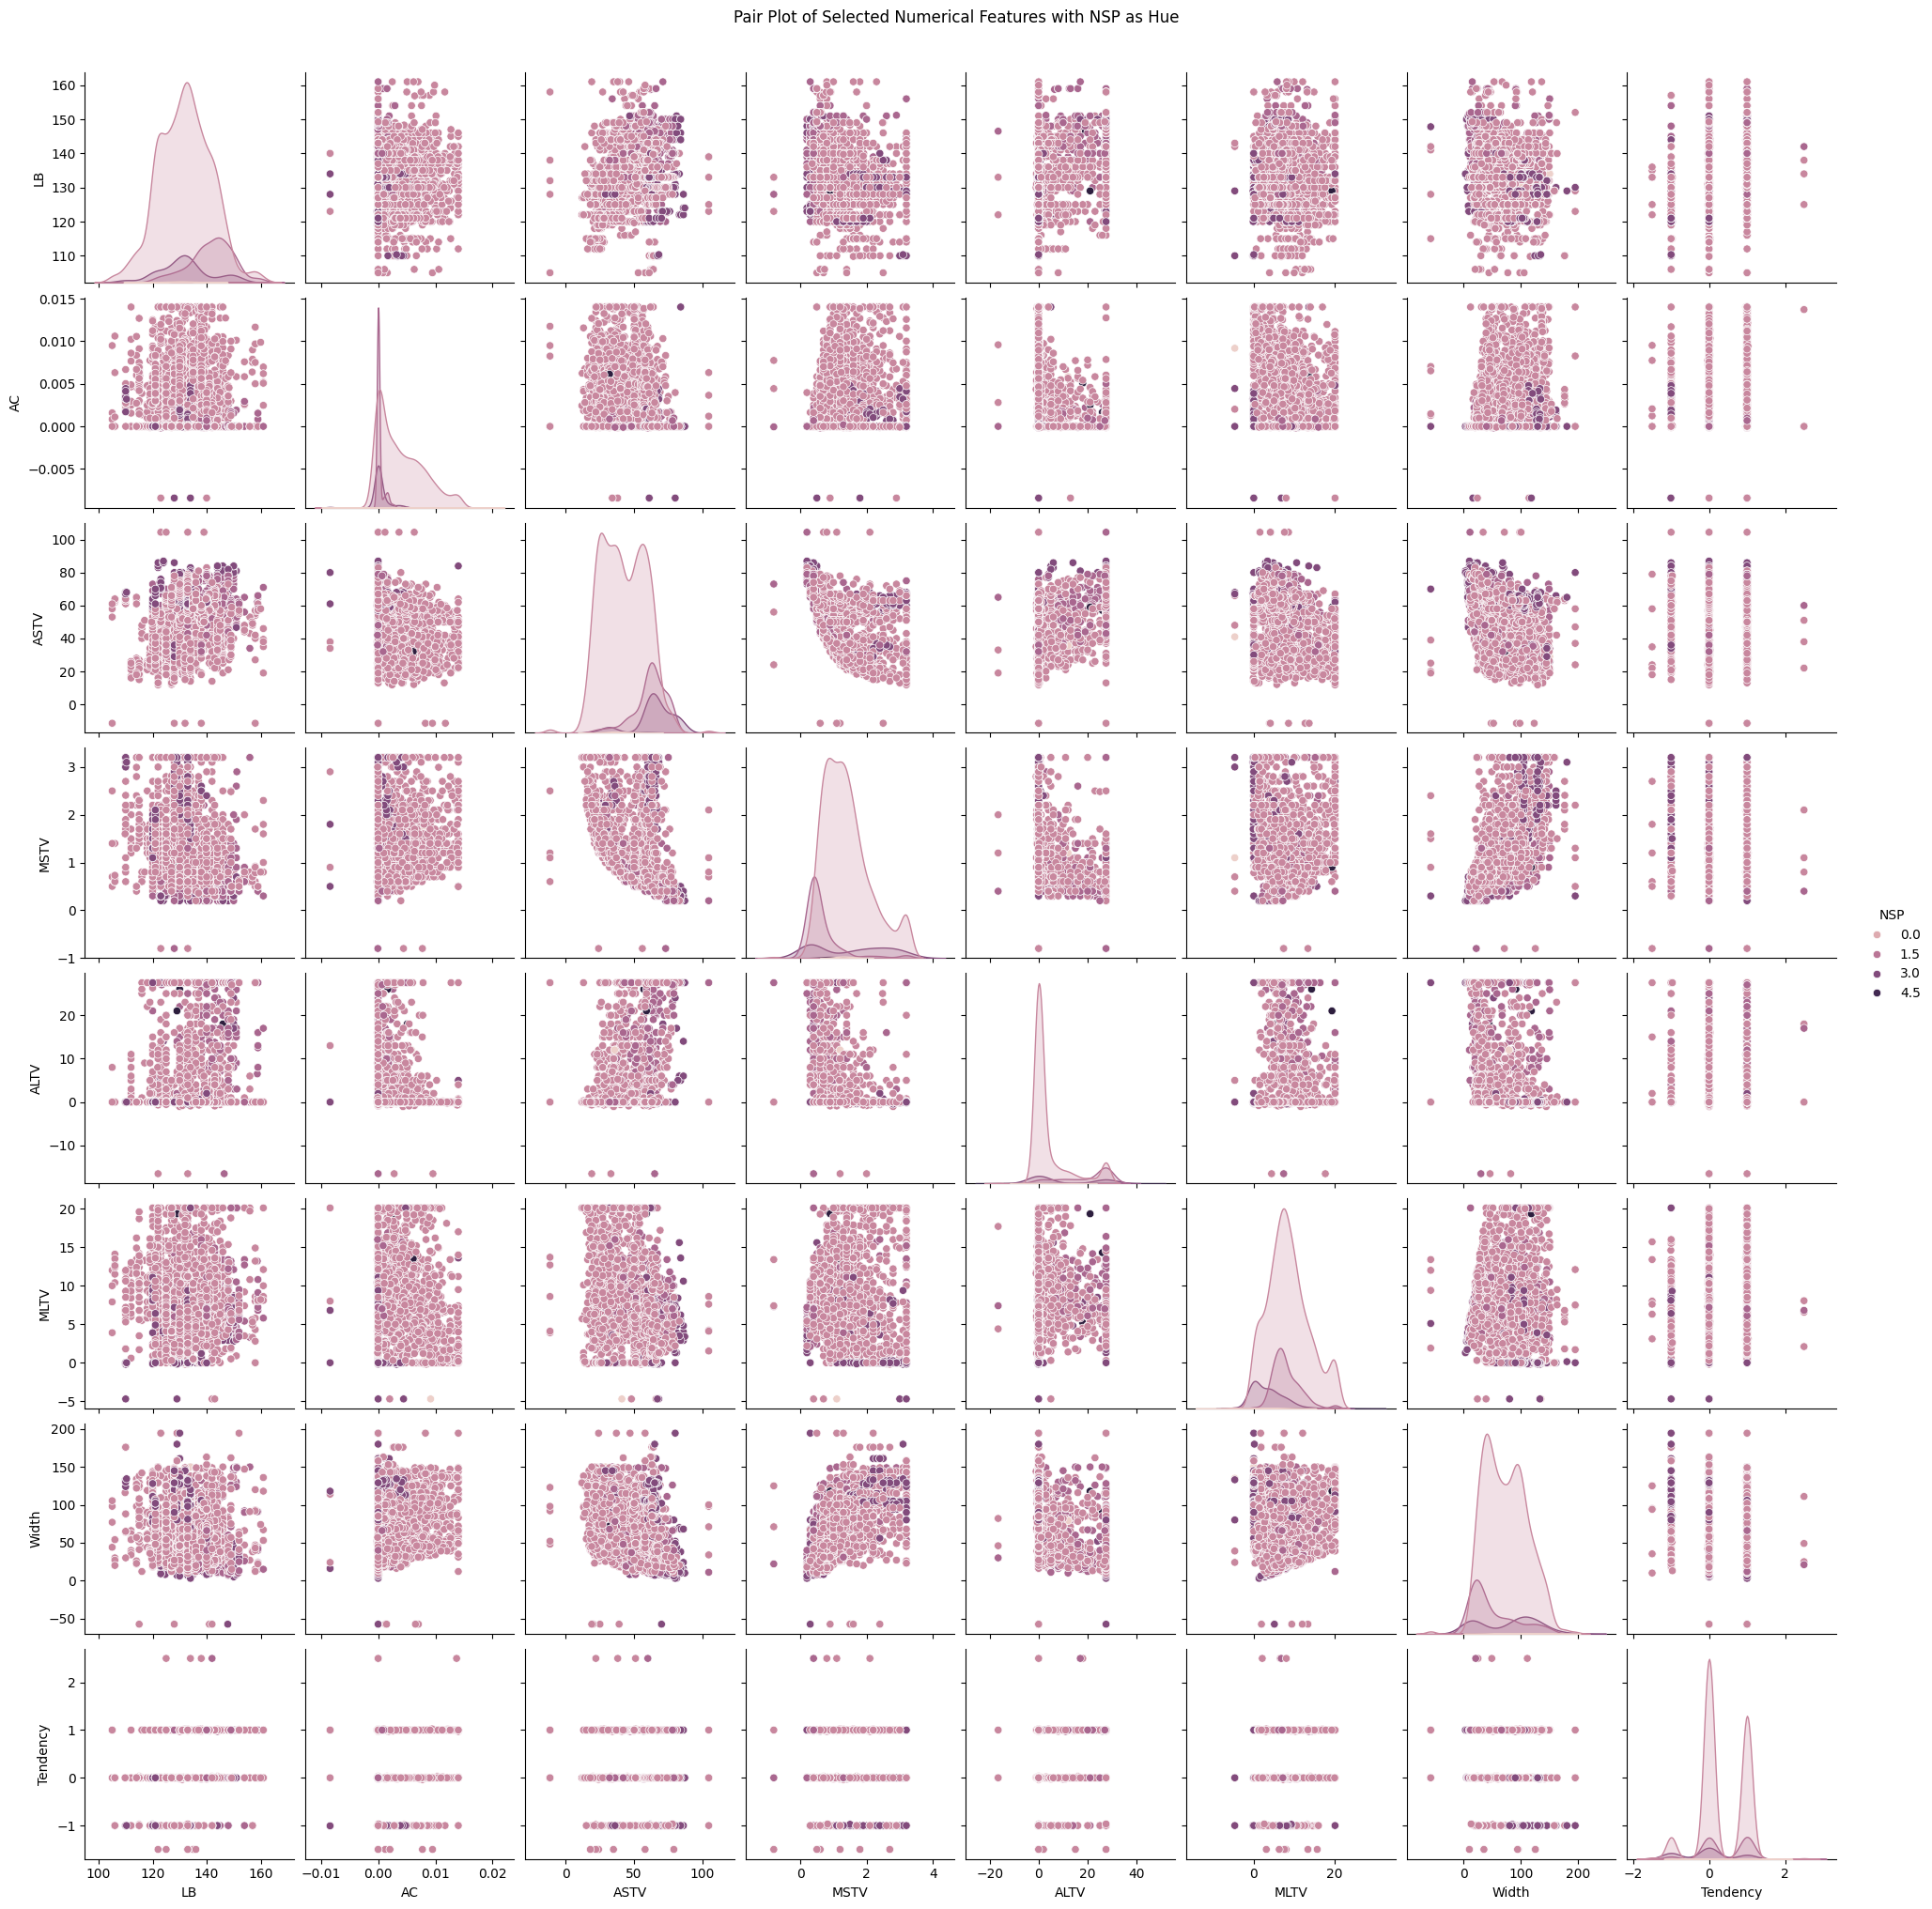

Pair plot of selected numerical features generated successfully.


In [14]:
selected_cols = ['LB', 'AC', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'Width', 'Tendency', 'NSP']

# Ensure all selected columns exist in the DataFrame
existing_cols = [col for col in selected_cols if col in df.columns]

# Create a pair plot for the selected columns, using 'NSP' as hue if it's in the existing columns
if 'NSP' in existing_cols:
    g = sns.pairplot(df[existing_cols], hue='NSP', diag_kind='kde')
else:
    g = sns.pairplot(df[existing_cols], diag_kind='kde')

g.fig.suptitle('Pair Plot of Selected Numerical Features with NSP as Hue', y=1.02) # Adjust title position
plt.show()

print("Pair plot of selected numerical features generated successfully.")

### Summary of Key Insights from EDA:

Based on the comprehensive exploratory data analysis, several key patterns, trends, and correlations have been identified within the Cardiotocographic dataset:

**1. Overall Data Distribution Characteristics:**
*   **Skewness and Zero Values:**
*   **Central Tendency:**

**2. Impact and Implications of Outlier Treatment:**
*   **Capping Effectiveness:**
*   **Negative Minimums:**
*   **NSP Anomaly:**

**3. Key Correlations and Their Implications (from Correlation Heatmap):**
*   **Strong Positive Correlations:**
*   **Strong Negative Correlations:**
    

**4. Pair Plot Observations (with NSP as Hue):**
*   **Distinct Clusters for NSP:**
*   **Relationships across NSP:**
*   **Unimodal vs. Multimodal:**

**5. Implications for Dataset's Objective (Fetal Health):**

## Summary:

### Data Analysis Key Findings

*   **Initial Data Overview**:
*   **Missing Values**:
*   **Data Type Consistency**:
*   **Outlier Presence and Treatment Impact**:
*   **Distribution Characteristics**:
*   **Key Correlations**:
*   **`NSP` as a `Discriminator`**:

### Insights or Next Steps

*   The analysis strongly suggests that `AC`, `DL`, `DS`, `DP`, and various fetal heart rate variability parameters (`ASTV`, `MSTV`, `ALTV`, `MLTV`, `Width`) are critical indicators for assessing fetal well-being, and their values are directly influential in the classification of the `NSP` (Normal Status Pattern).
*   Prioritize addressing the identified data quality issues, specifically the presence of negative values in physiologically non-negative columns. Consult with domain experts to determine the appropriate handling (e.g., setting to zero, treating as invalid, or marking as missing) before proceeding with advanced modeling.
